Гусєва Анна, варіант 2

1. Підключіться до одного з наборів даних на Kaggle.
Розберіться у тому, як влаштований ваш датасет і яка постановка задачі

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

path = "/content/drive/My Drive/bigml_59c28831336c6604c800002a.csv"
bnk = pd.read_csv(path, sep=',')
bnk.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


2. Оберіть цільову ознаку (target). Яка із задач навчання з учителем розглядається —
класифікація чи регресія?

Розглядається задача класифікації, так як маємо розподіл за двома категоріями (користувач або лоялен або ні)

3. Яким є розподіл значень target-змінної? Побудуйте відповідну візуалізацію. Прокоментуйте результат

In [ ]:
print(bnk['churn'].value_counts())
bnk['churn'].value_counts(normalize = True)

False    2850
True      483
Name: churn, dtype: int64


False    0.855086
True     0.144914
Name: churn, dtype: float64

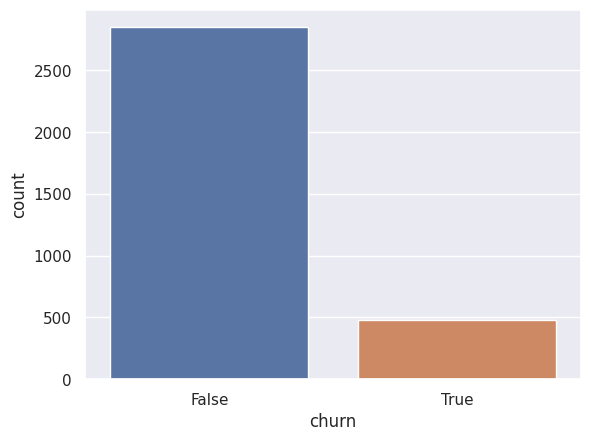

In [ ]:
sns.countplot(data = bnk, x = 'churn')
plt.show()

4. Проведіть необхідну попередню обробку даних (preprocessing). Для побудови
моделей за допомогою метричних методів усі ознаки мають бути закодовані
числами. Корисними будуть такі методи бібліотеки Pandas:

• map() — для перекодування категоріальної змінної числовими мітками;

• get_dummies() — для створення декількох бінарних ознак на основі категоріальної

Також може знадобитися масштабування даних (scaling). Скористайтеся класом
бібліотеки Scikit-learn

In [ ]:
bnk.groupby('area code')['phone number'].count()

area code
408     838
415    1655
510     840
Name: phone number, dtype: int64

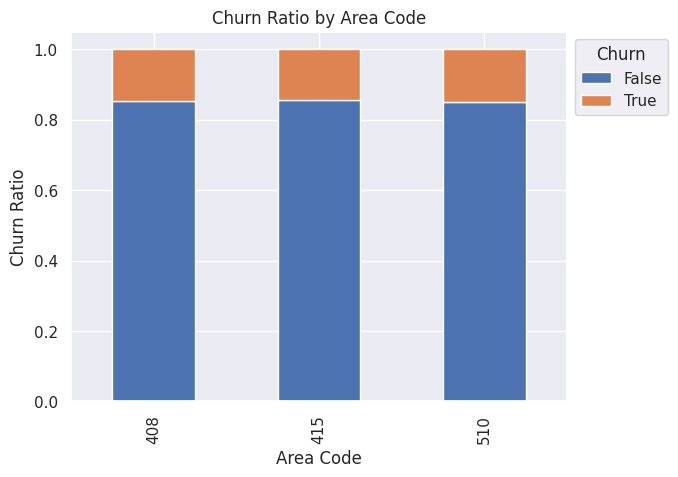

In [ ]:
area_churn_counts = bnk.groupby('area code')['churn'].value_counts().unstack()

area_churn_ratio = area_churn_counts.div(area_churn_counts.sum(axis=1), axis=0)

area_churn_ratio.plot(kind='bar', stacked=True)
plt.title('Churn Ratio by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Churn Ratio')
plt.legend(title='Churn', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
bnk.drop(["phone number","area code"], axis = 1, inplace=True)
bnk.head(10)

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [ ]:
bnk['international plan'] = bnk['international plan'].map({'no': 0, 'yes': 1})
bnk['voice mail plan'] = bnk['voice mail plan'].map({'no': 0, 'yes': 1})
bnk['churn'] = bnk['churn'].map({False: 0, True: 1})
bnk.head(10)

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [ ]:
bnk = pd.get_dummies(bnk, columns=['state'], prefix=['state'], drop_first=True)
bnk.head(10)

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0
5,118,1,0,0,223.4,98,37.98,220.6,101,18.75,...,0,0,0,0,0,0,0,0,0,0
6,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,0,0,0,0,0,0,0,0,0,0
7,147,1,0,0,157.0,79,26.69,103.1,94,8.76,...,0,0,0,0,0,0,0,0,0,0
8,117,0,0,0,184.5,97,31.37,351.6,80,29.89,...,0,0,0,0,0,0,0,0,0,0
9,141,1,1,37,258.6,84,43.96,222.0,111,18.87,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   voice mail plan         3333 non-null   int64  
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   int64  
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

std_col = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes',
                   'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                   'total intl calls', 'total intl charge', 'customer service calls']

bnk[std_col] = scaler.fit_transform(bnk[std_col])
bnk.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.676489,0,1,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,...,0,0,0,0,0,0,0,0,0,0
1,0.149065,0,1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,...,0,0,0,0,0,0,0,0,0,0
2,0.902529,0,0,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,...,0,0,0,0,0,0,0,0,0,0
3,-0.428590,1,0,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,...,0,0,0,0,0,0,0,0,0,0
4,-0.654629,1,0,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
target = bnk.pop('churn')

Розбийте набір даних на навчальну та валідаційну (тестову) вибірки за допомогою
методу train_test_split

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.under_sampling import NearMiss

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(bnk, target, test_size=0.25, random_state=12)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

Навчіть алгоритм класифікації kNeighborsClassifier або регресії
KNeighborsRegressor . Оцініть якість кожної моделі на валідаційній вибірці за
допомогою
• accuracy_score для класифікації;
• mean_squared_error для регресії.
Порівняйте результати та зробіть висновки

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
preds = knn.predict(X_valid)
print('Accuracy:', accuracy_score(y_valid, preds))

Accuracy: 0.8585131894484412


1. Створіть генератор розбиття, який перемішує вибірку перед створенням бло-
ків ( shuffle=True ). Число блоків n_splits дорівнює 5. Вкажіть параметр

random_state для відтворення результатів. Наприклад:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

Знайдіть показник якості моделі kNN на крос-валідації. Подумайте, чи прийнятне

використання вашої міри (метрики) якості у цій задачі? При необхідності пере-
рахуйте якість за допомогою іншої метрики з списку

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')

print('Масив значень метрики:', scores)
print('Середня метрика на крос-валідації:', np.mean(scores))

Массив значений метрики: [0.866      0.85       0.864      0.838      0.85370741]
Средняя метрика на кросс-валидации: 0.8543414829659319


2. Здійсніть крос-валідацію моделі при числі сусідів k ∈ [1;50]. Використовуйте

GridSearchCV . При якому k якість вийшла найкращою? Чому дорівнює ця оцін-
ка якості? Побудуйте графік значень метрики залежно від k

(matplotlib.pyplot.plot())

In [ ]:
knn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1, 50, 2),
         'p': np.arange(1, 5),
         'weights': ['uniform', 'distance']}

knn_grid = GridSearchCV(knn, params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [ ]:
best_knn = knn_grid.best_estimator_
preds = best_knn.predict(X_valid)
print('Accuracy:', accuracy_score(y_valid, preds))

Accuracy: 0.8657074340527577


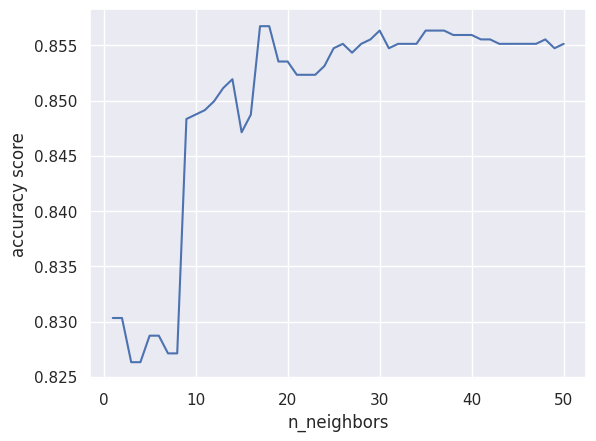

In [ ]:
x_values = np.arange(1, 51)
y_values = pd.DataFrame(knn_grid.cv_results_)['mean_test_score'][:50]

plt.plot(x_values, y_values)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy score')
plt.show()

1. Переберіть різні варіанти значень параметра p по сітці від 1 до 10 з таким кроком,
щоб всього було протестовано 20 варіантів (зручно використовувати функцію
numpy.linspace ).

Використовуйте KNeighborsClassifier або KNeighborsRegressor з опти-
мальним значенням n_neighbors , знайденим раніше. Задайте опцію

weights='distance' — цей параметр додає в алгоритм ваги, що залежать від
відстані до найближчих сусідів. В якості метрики якості знову використовуйте
accuracy . Якість оцінюйте за допомогою крос-валідації по 5 блоків.
2. Визначте, за якого p якість на крос-валідації виявилася оптимальною. Зверніть
увагу, що cross_val_score повертає масив показників якості блоків; необхідно
максимізувати середнє цих показників

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')

knn_params = {'p': np.linspace(1, 10, 20)}

knn_grid = GridSearchCV(knn, knn_params, cv=kf, scoring='accuracy')
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=7, weights='distance'),
             param_grid={'p': array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])},
             scoring='accuracy')

Поекспериментуйте з іншими метричними методами для задач регресії та класифікації,
представленими у бібліотеці Scikit-learn:

• RadiusNeighborsClassifier;

• RadiusNeighborsRegressor;

• NearestCentroid

In [ ]:
rn = RadiusNeighborsClassifier(radius=10)
rn.fit(X_train, y_train)
preds = rn.predict(X_valid)
print('Accuracy:', accuracy_score(y_valid, preds))

scores = cross_val_score(rn, X_train, y_train, cv=kf, scoring='accuracy')

print('Масив значень метрики:', scores)
print('Середня метрика на крос-валідації:', np.mean(scores))

Accuracy: 0.854916067146283
Масив значень метрики: [0.868      0.85       0.866      0.844      0.84769539]
Середня метрика на крос-валідації: 0.8551390781563126


In [ ]:
nc = NearestCentroid()
params = {'shrink_threshold': np.arange(8, 30, 2),
         'metric': ['euclidean', 'manhattan']}

nc_grid = GridSearchCV(nc, params, cv=5, scoring='accuracy', n_jobs=-1)
nc_grid.fit(X_train, y_train)
nc_grid.best_params_

{'metric': 'euclidean', 'shrink_threshold': 8}

In [ ]:
best_nc = nc_grid.best_estimator_
preds = best_nc.predict(X_valid)
print('Accuracy:', accuracy_score(y_valid, preds))

Accuracy: 0.854916067146283
